In [1]:
import matplotlib.pyplot as plt
import polars as pl
MAIN_PATH = "../data"

In [2]:
venue_areas = ['ai', 'information', 'mining', 'hci', 'linguistic', 'vision']
venue_map = {
    'impactful': 'Top General Science',
    'average': 'Computer Science',
    'ai': 'AI',
    'hci': 'HCI',
    'linguistic': 'NLP',
    'information': 'Database',
    'mining': 'Data Mining',
    'vision': 'Computer Vision',
}

In [3]:
import seaborn as sns

palette = sns.color_palette("colorblind", 8)
linestyles = ['-', '--', ':', '-.', (0, (1, 5)), (0, (5, 10)), (5, (10, 3)), (0, (3, 1, 1, 1, 1, 1))]

## Figure 5

/tmp/ipykernel_2202764/4128701908.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=df[df['venue_area'].eq(area)][df[dimension]],
/tmp/ipykernel_2202764/4128701908.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=df[df['venue_area'].eq(area)][df[dimension]],
/tmp/ipykernel_2202764/4128701908.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=df[df['venue_area'].eq(area)][df[dimension]],
/tmp/ipykernel_2202764/4128701908.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=df[df['venue_area'].eq(area)][df[dimension]],
/tmp/ipykernel_2202764/4128701908.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=df[df['venue_area'].eq(area)][df[dimension]],
/tmp/ipykernel_2202764/4128701908.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=df[df['venue_area'].eq(are

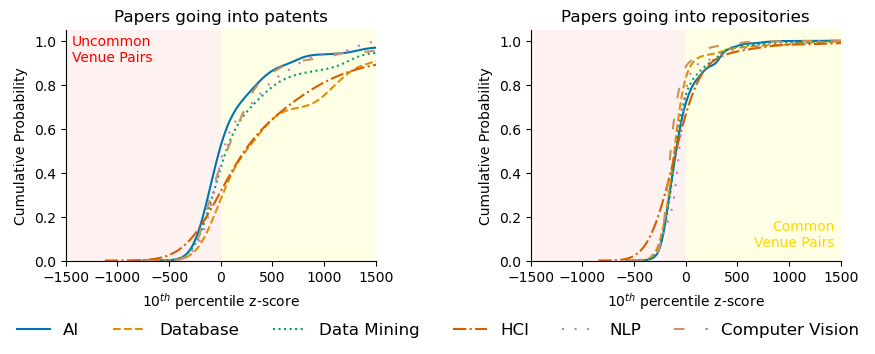

In [4]:
corpus = (
    pl.read_parquet(f'{MAIN_PATH}/corpus-240306-atypical.parquet')
    .filter(~pl.col('title').str.contains('(survey|benchmark|review|tutorial)'))
    .filter(pl.col('venue_area').is_in(venue_areas))
)
df = corpus.to_pandas()
df['topic'] = df['venue_area'].map(venue_map)
df['is_innovation_success'] = df['year_min_innovation'].notnull()
df['is_development_success'] = df['year_min_development'].notnull()
unique_areas = df['topic'].unique()

# Create the figure and axes
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3), sharex=False)

# Initialize lists to store legend handles and labels
leg_handles, leg_labels = [], []

# Generate a color palette based on the number of unique 'venue_area' values
colors = sns.color_palette("colorblind", len(unique_areas))
xmin, xmax = (-1500, 1500)


for ax, dimension in zip(axs.flatten(), ['is_innovation_success', 'is_development_success']):
    ax.axvspan(0, xmax, facecolor='yellow', alpha=0.1)
    ax.axvspan(xmin, 0, facecolor='salmon', alpha=0.1)
    for i, area in enumerate(venue_areas):
        sns.kdeplot(
            data=df[df['venue_area'].eq(area)][df[dimension]],
            x='atypical_10percentile',
            cumulative=True,
            common_norm=False,
            color=colors[i],
            linestyle=linestyles[i],
            ax=ax,
        )
    ax.set_title(dimension)
    ax.set_xlim(xmin, xmax)

    ax.set_xlabel('$10^{th}$ percentile z-score')
    ax.set_ylabel('Cumulative Probability')
sns.despine()
axs[0].set_title('Papers going into patents')
axs[1].set_title('Papers going into repositories')
# define areas
plt.text(0.02, 0.98, "Uncommon\nVenue Pairs", c='red', 
         transform=axs[0].transAxes, ha='left', va='top', fontsize=10)
plt.text(0.98, 0.05, "Common\nVenue Pairs", c='gold', 
         transform=axs[1].transAxes, ha='right', va='bottom', fontsize=10)
            
        
        
# Plot empty lines with the correct labels for the legend
for k, area in enumerate(venue_areas):
    empty_line, = ax.plot([], [], color=colors[k], linestyle=linestyles[k], label=venue_map[area])
    leg_handles.append(empty_line)
    leg_labels.append(venue_map[area])

# Put the legend outside the figure
axs[0].legend([], frameon=False)
plt.legend(handles=leg_handles, labels=leg_labels, ncols=6, frameon=False,
           bbox_to_anchor=(-.3, -.3), borderaxespad=0., loc='center', fontsize=12)

# Adjust the spacing between the subplots
fig.subplots_adjust(wspace=0.5, hspace=0.5)
plt.savefig("../figures/atypical-non-cumulative.pdf", bbox_inches='tight', pad_inches=0)